In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pylab as plt
from scipy.stats import norm
import math
import seaborn as sns

In [9]:
years = 3
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

In [11]:
# SPY: SPDR S&P 500 ETF Trust
# LQD: iShares iBoxx $ Investment Grade Corporate Bond ETF
# GLD: SPDR Gold Trust
# DBC: Invesco DB Commodity Index Tracking Fund
# FXE: Invesco CurrencyShares Euro Trust

In [13]:
tickers = ['SPY','LQD','GLD','DBC','FXE']

In [17]:
closePrices_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker,start=startDate,end=endDate)
    closePrices_df[ticker] = data['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [25]:
logReturn = np.log(closePrices_df/closePrices_df.shift(1))
logReturn = logReturn.dropna()

In [27]:
portfolio_cov = logReturn.cov()

In [29]:
portfolio_cov

,SPY,LQD,GLD,DBC,FXE
SPY,0.000121,0.000028,0.000016,0.000023,0.000022
LQD,0.000028,0.000039,0.000022,0.000003,0.000013
GLD,0.000016,0.000022,0.000084,0.000045,0.000019
DBC,0.000023,0.000003,0.000045,0.000153,0.000010
FXE,0.000022,0.000013,0.000019,0.000010,0.000026


In [31]:
def portfolio_expected_return(weights,logReturn):
    return np.sum(weights * logReturn.mean())

In [35]:
def portfolio_standard_deviation(weights,port_cov):
    port_variance = weights.T @ port_cov @ weights
    return np.sqrt(port_variance)
#创建计算组合标准差的公式

In [45]:
portfolio = 1000000
ticker_weight = 1/len(tickers)
port_weights = pd.Series({ticker:ticker_weight for ticker in tickers})

In [69]:
portExpReturn = portfolio_expected_return(port_weights, logReturn)
portStv = portfolio_standard_deviation(port_weights,portfolio_cov)

In [71]:
def z_core_rand():
    return np.random.normal(0,1)

In [124]:
def portfolio_PL(portSize, portExpReturn, portStv, days):
        days = 5
        portfolioValue = portSize
        for day in range(days):
            z_score = z_core_rand()
        portfolioValue = portfolioValue * np.exp(portExpReturn + z_score * portStv)
        return portfolioValue - portSize

In [130]:
simulationTimes = 100000
simulationResult = []
for i in range(simulationTimes):
    pl = portfolio_PL(portfolio,
                     portExpReturn,
                     portStv,
                     days)
    simulationResult.append(pl)

In [135]:
confidence_interval = 0.95
VaR = np.percentile(simulationResult,100 - confidence_interval*100)

In [137]:
print(VaR) 

-9192.155706025933


<function matplotlib.pyplot.show(close=None, block=None)>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimSun
findfont: Generic family 'sans-serif' not foun

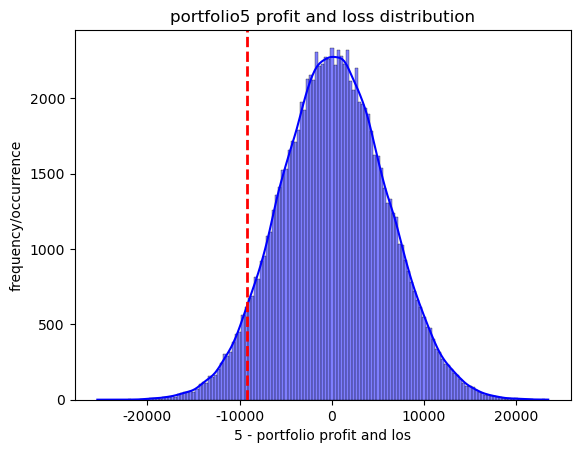

In [140]:
sns.histplot(simulationResult,kde=True, color='blue')
plt.xlabel(f'{days} - portfolio profit and los')
plt.ylabel('frequency/occurrence')
plt.title(f'portfolio{days} profit and loss distribution')
plt.axvline(VaR,color='r',linestyle='dashed',linewidth=2,label=f'在{confidence_interval:.0%}confidence_interval')
plt.legend
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['axes.unicode_minus']=False
plt.show